# Przygotowanie narzędzi 

In [ ]:
import os
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier       
from sklearn.svm import SVC                               
from sklearn.neural_network import MLPClassifier     
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import confusion_matrix.confusion_matrix as cm_module
import performance_metrics.performance_metrics as pm_module
import roc_curve.roc_curve as roc_module

# Reload - przydatne przy updatowaniu naszych plików 
importlib.reload(cm_module)
importlib.reload(pm_module)
importlib.reload(roc_module)

# Właściwe klasy
from confusion_matrix.confusion_matrix import ConfusionMatrix
from performance_metrics.performance_metrics import PerformanceMetrics
from roc_curve.roc_curve import ROC


# Wczytanie zbiorów danych

In [126]:
def load_breast_cancer():
    df = pd.read_csv("../datasets/breast_cancer/wdbc.data")
    df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})
    df = df.drop(columns=['ID'])
    df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)
    X = df.drop(columns=['Diagnosis'])
    y = df['Diagnosis']
    return train_test_split(X, y, test_size=0.3, random_state=42)


def load_student_performance():
    df = pd.read_csv("../datasets/students/all_students.csv")
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop("G3", axis=1)
    y = df["G3"].apply(lambda x: 1 if x >= 10 else 0)
    return train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = load_breast_cancer()
X_train_st, X_test_st, y_train_st, y_test_st = load_student_performance()

print("Breast Cancer Dataset:")
print("X_train shape:", X_train_bc.shape)
print("X_test shape:", X_test_bc.shape)
print("y_train shape:", y_train_bc.shape)
print("y_test shape:", y_test_bc.shape)

print("\nStudent Performance Dataset:")
print("X_train shape:", X_train_st.shape)
print("X_test shape:", X_test_st.shape)
print("y_train shape:", y_train_st.shape)
print("y_test shape:", y_test_st.shape)

Breast Cancer Dataset:
X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)

Student Performance Dataset:
X_train shape: (730, 41)
X_test shape: (314, 41)
y_train shape: (730,)
y_test shape: (314,)


# Trening, ewaluacja i porównanie modeli

 #### Z zastosowaniem własno zaimplementowanych technik oceny klasyfikacji oraz technik z biblioteki sk-learn

In [128]:
# wyglada ładnie ale chyab takiej useless troche - obecnie nie używam
datasets = {
    "Breast Cancer": (X_train_bc, X_test_bc, y_train_bc, y_test_bc),
    "Student Performance": (X_train_st, X_test_st, y_train_st, y_test_st),
}

In [129]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Neural Net (MLP)": MLPClassifier(max_iter=1000),
}

In [130]:
def train_model(model: BaseEstimator, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [131]:
def get_predictions(model, X_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    return y_pred, y_proba


In [132]:
def evaluate_our_metrics(y_test, y_pred):
    print("Nasze metryki:")
    pm = PerformanceMetrics(y_test, y_pred)
    pm.print_report()


In [133]:
def evaluate_our_confusion_matrix(y_test, y_pred):
    print("\nNasza macierz pomyłek:")
    cm = ConfusionMatrix(y_test, y_pred)
    # cm.print_matrix()
    cm.plot()


In [134]:
def evaluate_our_roc(y_test, y_proba):
    if y_proba is not None:
        print("\nNasze ROC:")
        roc = ROC(y_test, y_proba)
        roc.plot()


In [135]:
def evaluate_sklearn_metrics(y_test, y_pred):
    print("\nSklearn classification report:")
    print(classification_report(y_test, y_pred))


In [136]:
def evaluate_sklearn_confusion_matrix(y_test, y_pred, labels=None):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels if labels else np.unique(y_test),
                yticklabels=labels if labels else np.unique(y_test))
    
    plt.title("SK-learn Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [137]:
def evaluate_sklearn_roc(y_test, y_proba):
    if y_proba is not None:
        print("\nSklearn ROC AUC:", roc_auc_score(y_test, y_proba))
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label='Sklearn ROC')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (sklearn)")
        plt.legend()
        plt.grid()
        plt.show()

### Regresja logistyczna 

Regresjsa logistyczna 

Trening dla zbioru breast 
ealuacja naszym performance metrics
ewaluacji sk-learn performance metrics
ewaluacja naszym cm 
ewaluacji sk cm
ealuacja naszym roc 
ewaluacj sk-roc 

Trening dla zbioru students  
ealuacja naszym performance metrics
ewaluacji sk-learn performance metrics
ewaluacja naszym cm 
ewaluacji sk cm
ealuacja naszym roc 
ewaluacj sk-roc 

Powtorz to wszystko dla decision trees, svm ... 



In [138]:
model = models["Logistic Regression"]

##### Breast Cancer Dataset

In [148]:
trained_model = train_model(model, X_train_bc, y_train_bc)
y_pred_bc, y_proba_bc = get_predictions(trained_model, X_test_bc)

In [149]:
evaluate_our_metrics(y_test_bc, y_pred_bc)

Nasze metryki:
Our Classification Report
   Accuracy  Precision  Recall  F1 Score
0    0.9815     0.9815  0.9815    0.9815
1    0.9683     0.9683  0.9683    0.9683

Averaged metrics:
------------------------------------------------------------
Micro     | Acc: 0.9766  Prec: 0.9766  Rec: 0.9766  F1: 0.9766
Macro     | Acc: 0.9749  Prec: 0.9749  Rec: 0.9749  F1: 0.9749
Weighted  | Acc: 0.9766  Prec: 0.9766  Rec: 0.9766  F1: 0.9766


In [150]:
evaluate_sklearn_metrics(y_test_bc, y_pred_bc)


Sklearn classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171




Nasza macierz pomyłek:


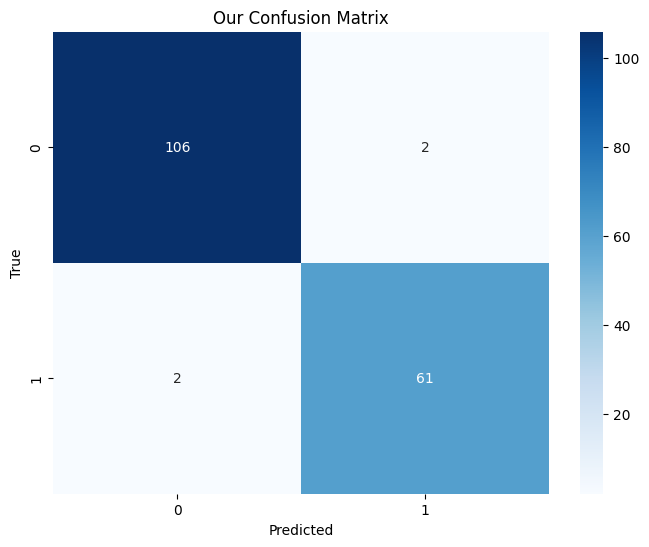

In [151]:
evaluate_our_confusion_matrix(y_test_bc, y_pred_bc)

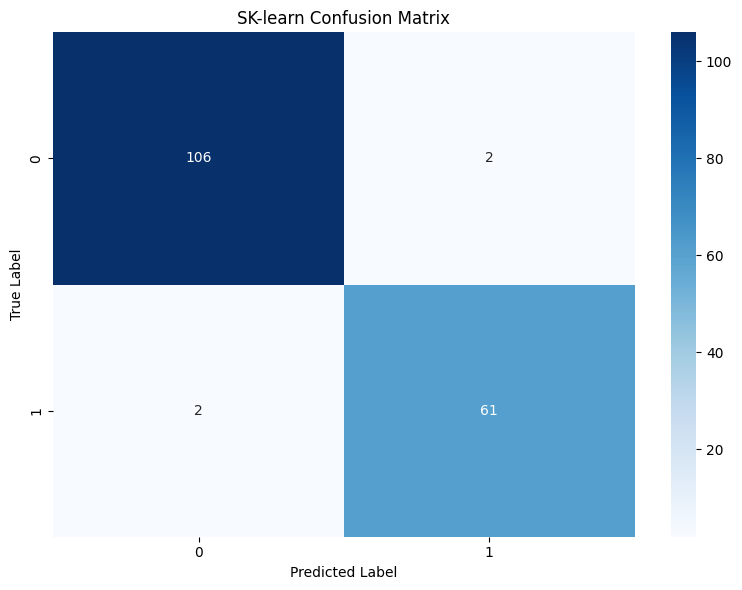

In [152]:
evaluate_sklearn_confusion_matrix(y_test_bc, y_pred_bc)


Nasze ROC:


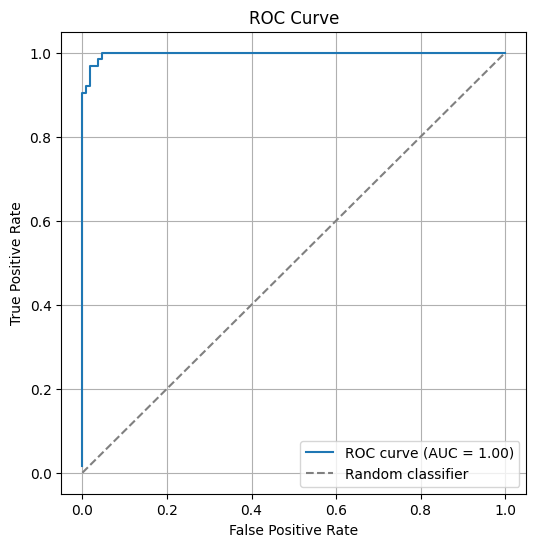

In [153]:
evaluate_our_roc(y_test_bc, y_proba_bc)


Sklearn ROC AUC: 0.9976484420928865


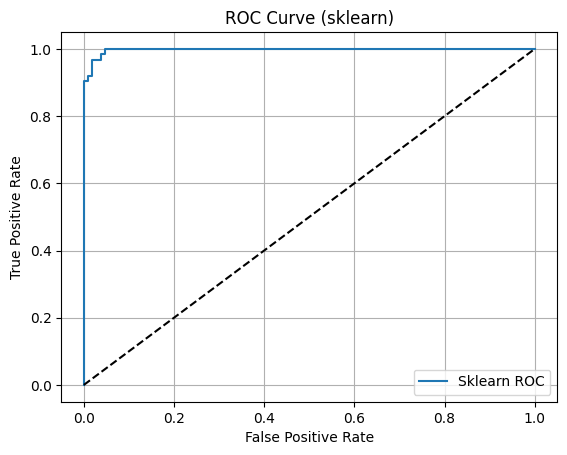

In [154]:
evaluate_sklearn_roc(y_test_bc, y_proba_bc)

##### Student Performance Dataset

In [158]:
trained_model = train_model(model, X_train_st, y_train_st)
y_pred_st, y_proba_st = get_predictions(trained_model, X_test_st)

In [159]:
evaluate_our_metrics(y_test_st, y_pred_st)

Nasze metryki:
Our Classification Report
   Accuracy  Precision  Recall  F1 Score
0    0.8594     0.6962  0.8594    0.7692
1    0.9040     0.9617  0.9040    0.9320

Averaged metrics:
------------------------------------------------------------
Micro     | Acc: 0.8949  Prec: 0.8949  Rec: 0.8949  F1: 0.8949
Macro     | Acc: 0.8817  Prec: 0.8290  Rec: 0.8817  F1: 0.8506
Weighted  | Acc: 0.8949  Prec: 0.9076  Rec: 0.8949  F1: 0.8988


In [160]:
evaluate_sklearn_metrics(y_test_st, y_pred_st)


Sklearn classification report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        79
           1       0.90      0.96      0.93       235

    accuracy                           0.89       314
   macro avg       0.88      0.83      0.85       314
weighted avg       0.89      0.89      0.89       314




Nasza macierz pomyłek:


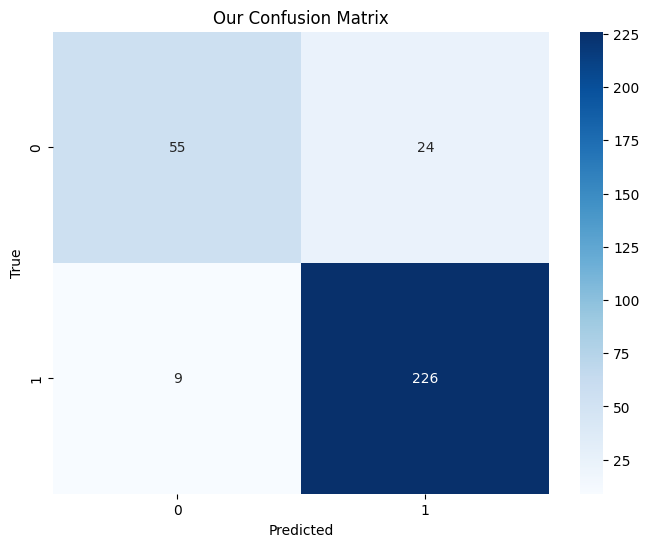

In [161]:
evaluate_our_confusion_matrix(y_test_st, y_pred_st)

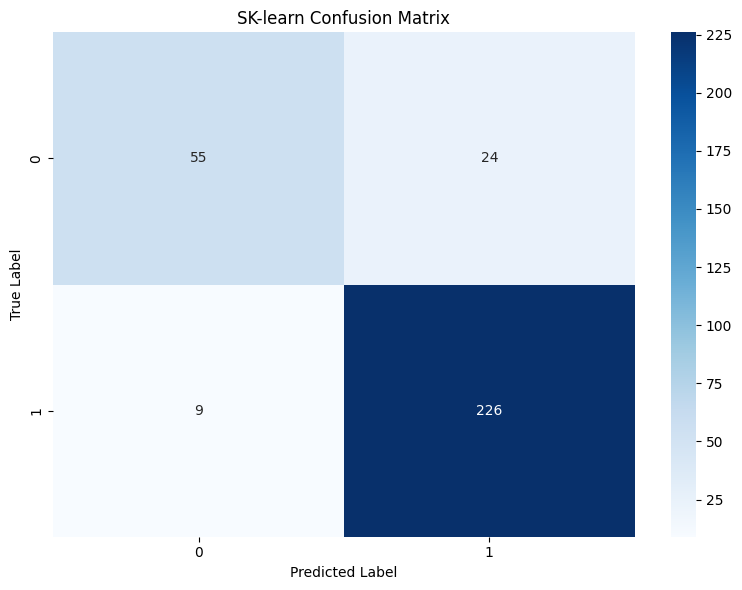

In [162]:
evaluate_sklearn_confusion_matrix(y_test_st, y_pred_st)


Nasze ROC:


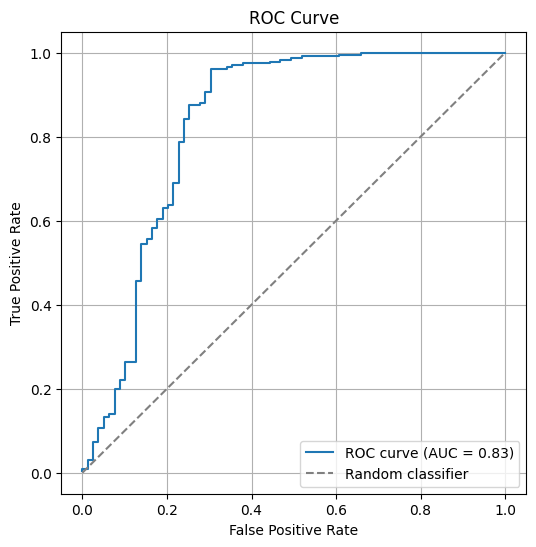

In [163]:
evaluate_our_roc(y_test_st, y_pred_st)


Sklearn ROC AUC: 0.8289523296525719


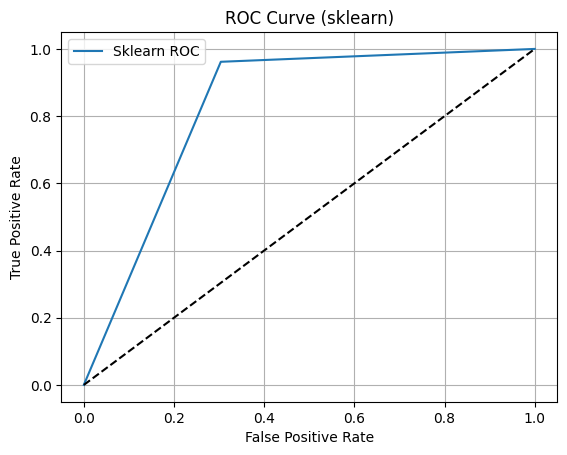

In [164]:
evaluate_sklearn_roc(y_test_st, y_pred_st)